In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [6]:
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
X_train = df_train.drop('label',axis='columns')
y_train = df_train['label']

X_test = df_test.drop('label',axis='columns')
y_test = df_test['label']
y_train.head()


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [8]:
myDict = {0: ['A'], 5: ['F'], 6: ['G']}

In [10]:
model= SVC()
model.fit(X_train, y_train)

SVC()

In [6]:
model.score(X_test, y_test)

0.8418851087562744

In [11]:
#data for 6 = G
#res =model.predict([[149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,154,153,154,154,153,154,153,154,153,153,152,152,152,151,150,151,150,151,151,152,152,152,153,153,152,152,152,153,154,154,155,155,154,154,155,155,155,155,154,153,153,151,151,152,150,151,151,152,152,152,154,154,154,154,154,153,154,155,156,157,157,156,155,156,155,154,154,155,152,154,153,153,151,152,152,152,154,154,154,154,154,155,157,156,156,156,154,150,146,147,146,147,143,137,126,126,142,139,152,154,152,153,153,154,154,155,154,155,155,154,153,150,144,143,145,139,142,144,157,157,147,139,128,119,130,113,147,156,151,153,153,155,155,156,155,152,145,139,141,141,141,153,153,143,135,137,139,133,121,107,101,104,110,127,157,156,151,152,153,155,155,154,151,146,139,131,130,134,137,132,125,111,101,94,95,105,113,122,133,145,153,157,156,156,152,152,154,152,151,150,149,149,139,122,104,98,92,82,81,81,85,114,145,157,160,162,161,159,157,156,156,156,151,151,150,146,145,147,148,147,145,132,97,71,62,66,88,116,145,162,160,159,157,155,156,157,157,156,155,155,151,145,144,145,147,145,147,150,150,124,92,68,63,67,86,159,163,155,158,157,156,156,157,156,156,156,155,154,143,144,145,145,143,147,152,152,128,90,79,68,64,70,67,84,147,164,157,158,157,157,157,156,157,156,156,155,145,146,143,145,145,150,149,149,139,118,85,62,62,75,73,62,67,140,164,157,158,158,158,158,157,157,156,156,150,147,144,147,149,148,149,158,158,136,94,63,58,69,85,82,67,70,156,160,159,160,159,158,157,156,156,156,147,148,147,145,148,152,151,160,153,119,86,66,64,63,69,75,78,57,130,165,158,159,158,159,158,157,157,157,149,148,146,145,147,149,146,151,144,110,78,65,66,66,58,59,64,79,150,165,162,162,162,162,161,161,158,156,151,146,143,141,138,140,142,146,144,121,84,56,62,70,71,68,57,117,144,144,147,149,152,150,146,146,154,160,147,144,143,142,140,142,146,151,154,131,85,59,51,60,85,69,64,76,75,79,81,79,76,83,112,141,163,163,144,148,147,145,145,148,150,155,151,119,74,62,63,55,62,72,73,77,74,73,68,88,113,138,162,162,168,168,146,146,142,141,141,138,134,142,124,96,75,67,65,63,62,78,87,76,84,96,126,162,172,155,144,149,151,161,142,136,132,134,127,119,118,119,103,87,77,73,70,62,64,72,93,134,155,160,166,156,150,151,143,136,145,149,130,132,127,120,114,110,109,105,91,77,74,75,74,65,73,113,166,177,170,161,152,141,134,136,140,133,127,130,113,116,115,106,101,95,86,84,85,77,78,74,76,103,152,179,170,157,155,151,140,129,126,126,133,130,122,125,81,86,85,83,76,72,73,76,77,79,71,101,151,178,177,170,161,152,147,151,133,115,121,121,124,126,122,122,61,61,67,69,70,75,78,78,81,68,113,165,174,169,162,157,149,148,148,148,126,100,113,117,113,122,118,115,69,69,77,78,75,76,78,79,67,120,173,157,159,148,155,150,138,143,148,149,123,91,101,111,111,116,113,118,74,75,76,75,75,76,75,68,124,172,152,146,146,146,152,142,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107]])
#data for 5 = F
res =model.predict([[126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,142,143,142,142,116,138,141,140,141,140,139,138,137,136,136,134,133,135,138,139,139,141,142,143,142,143,145,145,143,145,145,158,94,118,151,143,144,144,142,141,141,140,139,138,137,139,142,142,142,144,146,146,146,147,147,147,148,117,128,168,101,98,157,146,147,146,146,145,144,143,142,141,140,142,145,146,147,148,149,149,149,151,151,149,161,114,99,174,99,84,162,149,151,149,148,147,146,146,145,144,143,145,149,150,150,151,153,153,154,153,154,152,167,126,88,169,99,87,164,152,153,152,151,150,149,148,148,147,145,147,151,152,153,155,155,155,151,154,158,155,170,130,79,166,111,93,166,156,157,156,155,153,152,152,152,150,149,150,153,155,155,158,157,163,129,120,166,156,171,140,82,162,102,97,168,158,160,158,162,160,154,154,154,152,151,152,156,158,159,159,158,164,139,91,165,159,174,144,71,156,96,100,171,161,161,158,128,145,162,156,155,155,152,155,159,160,161,161,160,168,158,76,159,164,172,142,63,155,117,100,174,159,164,164,126,103,162,161,158,157,153,157,160,162,162,162,164,167,158,78,158,167,167,156,73,133,129,102,172,157,148,130,156,132,129,163,161,159,157,159,162,164,164,165,166,167,173,89,139,172,162,163,79,98,132,111,170,160,142,54,125,150,102,150,167,162,159,161,166,165,167,167,167,168,178,118,112,175,164,167,82,91,129,110,160,156,130,96,157,130,106,169,165,164,159,162,166,167,168,168,170,169,164,168,132,141,162,153,103,113,117,96,133,143,107,147,172,99,139,174,165,166,161,164,167,170,171,171,170,173,160,173,162,129,132,132,109,109,108,99,135,142,111,163,154,77,156,172,167,167,165,167,168,171,172,173,173,174,169,170,182,150,125,124,100,106,103,102,130,138,124,178,130,64,168,172,170,169,165,168,170,171,172,174,175,174,175,172,195,170,114,110,94,89,98,105,127,134,124,182,126,80,180,171,171,171,166,169,171,172,173,174,175,176,177,174,197,179,119,86,87,81,94,118,136,123,116,177,127,94,183,172,173,173,169,172,172,174,175,174,177,178,178,175,192,176,126,87,86,82,109,130,147,159,128,164,128,100,184,174,173,173,169,172,173,173,176,178,179,178,181,175,189,171,126,89,80,90,121,137,164,175,141,140,108,95,184,176,175,173,171,173,174,175,177,179,179,179,181,174,189,171,134,91,80,98,134,159,164,167,153,114,73,82,185,176,177,177,172,173,174,177,178,179,180,180,183,174,186,172,138,93,82,97,143,172,169,160,132,89,44,108,189,176,178,178,171,173,177,178,179,180,181,182,185,178,179,170,137,95,88,90,152,180,167,141,112,65,64,176,183,179,179,178,173,174,178,179,179,180,182,183,186,175,165,168,137,100,96,88,149,168,147,122,92,50,144,193,181,181,180,179,173,174,177,179,180,180,183,182,187,177,158,161,130,111,101,91,136,150,135,112,62,87,192,183,185,183,181,180,173,174,177,178,179,179,181,182,184,179,156,151,124,116,96,88,128,138,126,81,49,164,190,184,185,184,182,181,172,174,177,178,178,178,180,182,184,177,160,154,128,114,97,78,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180]])
res

NameError: name 'model' is not defined

In [13]:
myDict[res[0]]

NameError: name 'myDict' is not defined

In [11]:
# Create the SVM model
svm_model = SVC()

In [9]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [10]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

NameError: name 'svm_model' is not defined

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

In [8]:
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

NameError: name 'best_params' is not defined

In [ ]:
#model = SVC()

In [ ]:
#model.fit(X_train, y_train)

In [7]:
best_svm_model.score(X_test, y_test)

NameError: name 'best_svm_model' is not defined

In [ ]:
#data for 6 = G
best_svm_model.predict([[149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,154,153,154,154,153,154,153,154,153,153,152,152,152,151,150,151,150,151,151,152,152,152,153,153,152,152,152,153,154,154,155,155,154,154,155,155,155,155,154,153,153,151,151,152,150,151,151,152,152,152,154,154,154,154,154,153,154,155,156,157,157,156,155,156,155,154,154,155,152,154,153,153,151,152,152,152,154,154,154,154,154,155,157,156,156,156,154,150,146,147,146,147,143,137,126,126,142,139,152,154,152,153,153,154,154,155,154,155,155,154,153,150,144,143,145,139,142,144,157,157,147,139,128,119,130,113,147,156,151,153,153,155,155,156,155,152,145,139,141,141,141,153,153,143,135,137,139,133,121,107,101,104,110,127,157,156,151,152,153,155,155,154,151,146,139,131,130,134,137,132,125,111,101,94,95,105,113,122,133,145,153,157,156,156,152,152,154,152,151,150,149,149,139,122,104,98,92,82,81,81,85,114,145,157,160,162,161,159,157,156,156,156,151,151,150,146,145,147,148,147,145,132,97,71,62,66,88,116,145,162,160,159,157,155,156,157,157,156,155,155,151,145,144,145,147,145,147,150,150,124,92,68,63,67,86,159,163,155,158,157,156,156,157,156,156,156,155,154,143,144,145,145,143,147,152,152,128,90,79,68,64,70,67,84,147,164,157,158,157,157,157,156,157,156,156,155,145,146,143,145,145,150,149,149,139,118,85,62,62,75,73,62,67,140,164,157,158,158,158,158,157,157,156,156,150,147,144,147,149,148,149,158,158,136,94,63,58,69,85,82,67,70,156,160,159,160,159,158,157,156,156,156,147,148,147,145,148,152,151,160,153,119,86,66,64,63,69,75,78,57,130,165,158,159,158,159,158,157,157,157,149,148,146,145,147,149,146,151,144,110,78,65,66,66,58,59,64,79,150,165,162,162,162,162,161,161,158,156,151,146,143,141,138,140,142,146,144,121,84,56,62,70,71,68,57,117,144,144,147,149,152,150,146,146,154,160,147,144,143,142,140,142,146,151,154,131,85,59,51,60,85,69,64,76,75,79,81,79,76,83,112,141,163,163,144,148,147,145,145,148,150,155,151,119,74,62,63,55,62,72,73,77,74,73,68,88,113,138,162,162,168,168,146,146,142,141,141,138,134,142,124,96,75,67,65,63,62,78,87,76,84,96,126,162,172,155,144,149,151,161,142,136,132,134,127,119,118,119,103,87,77,73,70,62,64,72,93,134,155,160,166,156,150,151,143,136,145,149,130,132,127,120,114,110,109,105,91,77,74,75,74,65,73,113,166,177,170,161,152,141,134,136,140,133,127,130,113,116,115,106,101,95,86,84,85,77,78,74,76,103,152,179,170,157,155,151,140,129,126,126,133,130,122,125,81,86,85,83,76,72,73,76,77,79,71,101,151,178,177,170,161,152,147,151,133,115,121,121,124,126,122,122,61,61,67,69,70,75,78,78,81,68,113,165,174,169,162,157,149,148,148,148,126,100,113,117,113,122,118,115,69,69,77,78,75,76,78,79,67,120,173,157,159,148,155,150,138,143,148,149,123,91,101,111,111,116,113,118,74,75,76,75,75,76,75,68,124,172,152,146,146,146,152,142,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107]])

**Tune parameters**

Class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

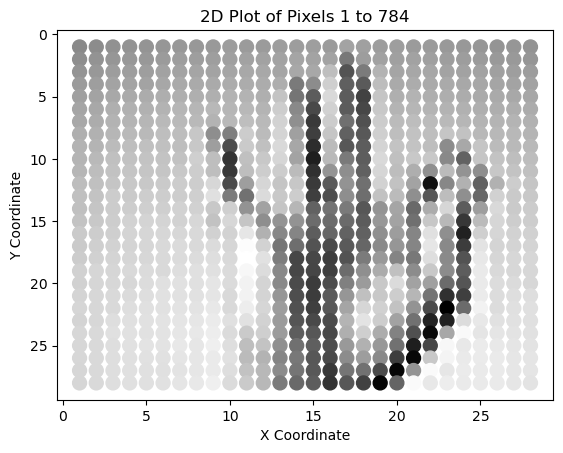

In [6]:
import matplotlib.pyplot as plt

#data for 7 = G
#pixel_values = [149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,154,153,154,154,153,154,153,154,153,153,152,152,152,151,150,151,150,151,151,152,152,152,153,153,152,152,152,153,154,154,155,155,154,154,155,155,155,155,154,153,153,151,151,152,150,151,151,152,152,152,154,154,154,154,154,153,154,155,156,157,157,156,155,156,155,154,154,155,152,154,153,153,151,152,152,152,154,154,154,154,154,155,157,156,156,156,154,150,146,147,146,147,143,137,126,126,142,139,152,154,152,153,153,154,154,155,154,155,155,154,153,150,144,143,145,139,142,144,157,157,147,139,128,119,130,113,147,156,151,153,153,155,155,156,155,152,145,139,141,141,141,153,153,143,135,137,139,133,121,107,101,104,110,127,157,156,151,152,153,155,155,154,151,146,139,131,130,134,137,132,125,111,101,94,95,105,113,122,133,145,153,157,156,156,152,152,154,152,151,150,149,149,139,122,104,98,92,82,81,81,85,114,145,157,160,162,161,159,157,156,156,156,151,151,150,146,145,147,148,147,145,132,97,71,62,66,88,116,145,162,160,159,157,155,156,157,157,156,155,155,151,145,144,145,147,145,147,150,150,124,92,68,63,67,86,159,163,155,158,157,156,156,157,156,156,156,155,154,143,144,145,145,143,147,152,152,128,90,79,68,64,70,67,84,147,164,157,158,157,157,157,156,157,156,156,155,145,146,143,145,145,150,149,149,139,118,85,62,62,75,73,62,67,140,164,157,158,158,158,158,157,157,156,156,150,147,144,147,149,148,149,158,158,136,94,63,58,69,85,82,67,70,156,160,159,160,159,158,157,156,156,156,147,148,147,145,148,152,151,160,153,119,86,66,64,63,69,75,78,57,130,165,158,159,158,159,158,157,157,157,149,148,146,145,147,149,146,151,144,110,78,65,66,66,58,59,64,79,150,165,162,162,162,162,161,161,158,156,151,146,143,141,138,140,142,146,144,121,84,56,62,70,71,68,57,117,144,144,147,149,152,150,146,146,154,160,147,144,143,142,140,142,146,151,154,131,85,59,51,60,85,69,64,76,75,79,81,79,76,83,112,141,163,163,144,148,147,145,145,148,150,155,151,119,74,62,63,55,62,72,73,77,74,73,68,88,113,138,162,162,168,168,146,146,142,141,141,138,134,142,124,96,75,67,65,63,62,78,87,76,84,96,126,162,172,155,144,149,151,161,142,136,132,134,127,119,118,119,103,87,77,73,70,62,64,72,93,134,155,160,166,156,150,151,143,136,145,149,130,132,127,120,114,110,109,105,91,77,74,75,74,65,73,113,166,177,170,161,152,141,134,136,140,133,127,130,113,116,115,106,101,95,86,84,85,77,78,74,76,103,152,179,170,157,155,151,140,129,126,126,133,130,122,125,81,86,85,83,76,72,73,76,77,79,71,101,151,178,177,170,161,152,147,151,133,115,121,121,124,126,122,122,61,61,67,69,70,75,78,78,81,68,113,165,174,169,162,157,149,148,148,148,126,100,113,117,113,122,118,115,69,69,77,78,75,76,78,79,67,120,173,157,159,148,155,150,138,143,148,149,123,91,101,111,111,116,113,118,74,75,76,75,75,76,75,68,124,172,152,146,146,146,152,142,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107]

#data for 6 = F
pixel_values = [126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,142,143,142,142,116,138,141,140,141,140,139,138,137,136,136,134,133,135,138,139,139,141,142,143,142,143,145,145,143,145,145,158,94,118,151,143,144,144,142,141,141,140,139,138,137,139,142,142,142,144,146,146,146,147,147,147,148,117,128,168,101,98,157,146,147,146,146,145,144,143,142,141,140,142,145,146,147,148,149,149,149,151,151,149,161,114,99,174,99,84,162,149,151,149,148,147,146,146,145,144,143,145,149,150,150,151,153,153,154,153,154,152,167,126,88,169,99,87,164,152,153,152,151,150,149,148,148,147,145,147,151,152,153,155,155,155,151,154,158,155,170,130,79,166,111,93,166,156,157,156,155,153,152,152,152,150,149,150,153,155,155,158,157,163,129,120,166,156,171,140,82,162,102,97,168,158,160,158,162,160,154,154,154,152,151,152,156,158,159,159,158,164,139,91,165,159,174,144,71,156,96,100,171,161,161,158,128,145,162,156,155,155,152,155,159,160,161,161,160,168,158,76,159,164,172,142,63,155,117,100,174,159,164,164,126,103,162,161,158,157,153,157,160,162,162,162,164,167,158,78,158,167,167,156,73,133,129,102,172,157,148,130,156,132,129,163,161,159,157,159,162,164,164,165,166,167,173,89,139,172,162,163,79,98,132,111,170,160,142,54,125,150,102,150,167,162,159,161,166,165,167,167,167,168,178,118,112,175,164,167,82,91,129,110,160,156,130,96,157,130,106,169,165,164,159,162,166,167,168,168,170,169,164,168,132,141,162,153,103,113,117,96,133,143,107,147,172,99,139,174,165,166,161,164,167,170,171,171,170,173,160,173,162,129,132,132,109,109,108,99,135,142,111,163,154,77,156,172,167,167,165,167,168,171,172,173,173,174,169,170,182,150,125,124,100,106,103,102,130,138,124,178,130,64,168,172,170,169,165,168,170,171,172,174,175,174,175,172,195,170,114,110,94,89,98,105,127,134,124,182,126,80,180,171,171,171,166,169,171,172,173,174,175,176,177,174,197,179,119,86,87,81,94,118,136,123,116,177,127,94,183,172,173,173,169,172,172,174,175,174,177,178,178,175,192,176,126,87,86,82,109,130,147,159,128,164,128,100,184,174,173,173,169,172,173,173,176,178,179,178,181,175,189,171,126,89,80,90,121,137,164,175,141,140,108,95,184,176,175,173,171,173,174,175,177,179,179,179,181,174,189,171,134,91,80,98,134,159,164,167,153,114,73,82,185,176,177,177,172,173,174,177,178,179,180,180,183,174,186,172,138,93,82,97,143,172,169,160,132,89,44,108,189,176,178,178,171,173,177,178,179,180,181,182,185,178,179,170,137,95,88,90,152,180,167,141,112,65,64,176,183,179,179,178,173,174,178,179,179,180,182,183,186,175,165,168,137,100,96,88,149,168,147,122,92,50,144,193,181,181,180,179,173,174,177,179,180,180,183,182,187,177,158,161,130,111,101,91,136,150,135,112,62,87,192,183,185,183,181,180,173,174,177,178,179,179,181,182,184,179,156,151,124,116,96,88,128,138,126,81,49,164,190,184,185,184,182,181,172,174,177,178,178,178,180,182,184,177,160,154,128,114,97,78,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180]

# Create x and y coordinates for each pixel
x = list(range(1, 29)) * 28  # X-coordinate
y = [i for i in range(1, 29) for _ in range(28)]  # Y-coordinate

# Create a scatter plot of the pixels
plt.scatter(x, y, c=pixel_values, cmap="gray", s=100)  # 'gray' colormap for grayscale pixels

plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Plot of Pixels 1 to 784')

# Show the plot
plt.show()